<a href="https://colab.research.google.com/github/Rohith51591/DATAMINING/blob/main/ADM_PROJECT_1591.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.9864715014415614

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1925
           1       0.99      0.98      0.99      2584

    accuracy                           0.99      4509
   macro avg       0.99      0.99      0.99      4509
weighted avg       0.99      0.99      0.99      4509



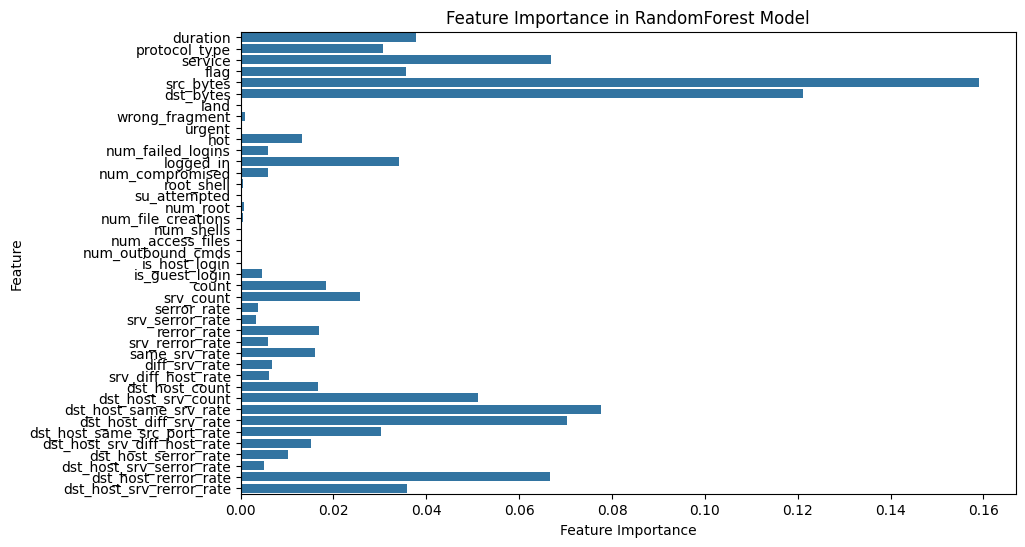

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
url = "https://raw.githubusercontent.com/Jehuty4949/NSL_KDD/refs/heads/master/KDDTest%2B.txt"
df = pd.read_csv(url, header=None)

# Assign column names
columns = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
           "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
           "logged_in", "num_compromised", "root_shell", "su_attempted",
           "num_root", "num_file_creations", "num_shells", "num_access_files",
           "num_outbound_cmds", "is_host_login", "is_guest_login", "count",
           "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate",
           "srv_rerror_rate", "same_srv_rate", "diff_srv_rate",
           "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
           "dst_host_same_srv_rate", "dst_host_diff_srv_rate",
           "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
           "dst_host_serror_rate", "dst_host_srv_serror_rate",
           "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "attack_type", "difficulty"]
df.columns = columns

# Drop 'difficulty' column as it's not useful for classification
df.drop(["difficulty"], axis=1, inplace=True)

# Encode categorical features
encoder = LabelEncoder()
for col in ["protocol_type", "service", "flag"]:
    df[col] = encoder.fit_transform(df[col])

# Convert attack types into binary labels (0 = normal, 1 = attack)
df["attack_label"] = df["attack_type"].apply(lambda x: 0 if x == "normal" else 1)

# Drop 'attack_type' as we no longer need it
df.drop(["attack_type"], axis=1, inplace=True)

# Split into training and testing sets
X = df.drop(columns=["attack_label"])
y = df["attack_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
numerical_features = X_train.select_dtypes(include=[np.number]).columns  # Get only numeric columns

X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

# Train a RandomForest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# Predictions
y_pred = clf.predict(X_test_scaled)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot Feature Importance
plt.figure(figsize=(10, 6))
importances = clf.feature_importances_
feature_names = X.columns
sns.barplot(x=importances, y=feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in RandomForest Model")
plt.show()
